In [2]:
import pandas as pd

In [3]:
# Loading our cleaned dataset
df = pd.read_csv('combined_themepark_dataset.csv')

In [4]:
df.columns

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'nr_likes',
       'link_posts', 'picture_posts', 'video_posts', 'profile_id', 'post_id',
       'link', 'followers', 'engagement'],
      dtype='object')

In [5]:
df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,20,1,0,2,NaN,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22.000000
14905,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9.000000
14906,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,701.000018
14907,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\r\...,58,7,2,9,NaN,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,63.000013


Import excel with the themeparks and timezones

In [6]:
import pandas as pd

# Loading our cleaned dataset
timeDf = pd.read_excel('Timezones.xlsx')

# Display the DataFrame
timeDf

,Profile,Timezone
0,Wild Adventures Theme Park,ET: 6 hours
1,Fun Spot America,ET: 6 hours
2,Silverwood Theme Park,PT: 9 hours
3,Belmont Park,PT: 9 hours
4,SeaWorld Orlando,ET: 6 hours
5,SeaWorld San Diego,PT: 9 hours
6,Lake Compounce,ET: 6 hours
7,Happy Hollow Park & Zoo,PT: 9 hours
8,Universal Orlando Resort (US),ET: 6 hours
9,Busch Gardens Tampa Bay,ET: 6 hours


Timezone split and hour extraction

In [7]:
# Split the 'Timezone' column and extract the number of hours
timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)

# Display the updated dataframe
timeDf

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\matth\AppData\Local\Temp\ipykernel_8956\2307643195.py:2: SyntaxWarning: invalid escape sequence '\d'
  timeDf['Difference'] = timeDf['Timezone'].str.split(':').str[-1].str.strip().str.extract('(\d+)').astype(int)


,Profile,Timezone,Difference
0,Wild Adventures Theme Park,ET: 6 hours,6
1,Fun Spot America,ET: 6 hours,6
2,Silverwood Theme Park,PT: 9 hours,9
3,Belmont Park,PT: 9 hours,9
4,SeaWorld Orlando,ET: 6 hours,6
5,SeaWorld San Diego,PT: 9 hours,9
6,Lake Compounce,ET: 6 hours,6
7,Happy Hollow Park & Zoo,PT: 9 hours,9
8,Universal Orlando Resort (US),ET: 6 hours,6
9,Busch Gardens Tampa Bay,ET: 6 hours,6


Rename the 'Profile' column to 'profile' to fit the standard

In [8]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Profile': 'profile'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile     Timezone  Difference
0  Wild Adventures Theme Park  ET: 6 hours           6
1            Fun Spot America  ET: 6 hours           6
2       Silverwood Theme Park  PT: 9 hours           9
3                Belmont Park  PT: 9 hours           9
4            SeaWorld Orlando  ET: 6 hours           6


Rename the 'Date' column to 'date' to fit the standard

In [9]:
# Assuming merged_df is your DataFrame
timeDf.rename(columns={'Date': 'date'}, inplace=True)

# Now 'Profile' column is changed to 'profile'
print(timeDf.head())


                      profile     Timezone  Difference
0  Wild Adventures Theme Park  ET: 6 hours           6
1            Fun Spot America  ET: 6 hours           6
2       Silverwood Theme Park  PT: 9 hours           9
3                Belmont Park  PT: 9 hours           9
4            SeaWorld Orlando  ET: 6 hours           6


Check for matching profiles

In [10]:
# Check for Matching Profiles
print(set(df['profile']).difference(set(timeDf['profile'])))
print(set(timeDf['profile']).difference(set(df['profile'])))

# Trim Spaces
df['profile'] = df['profile'].str.strip()
timeDf['profile'] = timeDf['profile'].str.strip()

# Check for Case Sensitivity
df['profile'] = df['profile'].str.lower()
timeDf['profile'] = timeDf['profile'].str.lower()

{'centreville amusement park', 'six flags', 'six flags great escape and hurricane harbor', 'playland park', 'busch gardens tampa bay', 'walt disney world', 'waterville usa', 'seaworld san diego', 'sesame place san diego', 'gilroy gardens', 'glenwood caverns adventure park', 'elitch gardens', 'castles n coasters', 'seaworld orlando', 'universal studios hollywood', 'happy hollow park & zoo', 'pacific park', 'playland', 'seaworld', 'disneyland', 'sea life park', 'six flags great america/hurricane harbor', "big kahuna's nj", 'disneyland paris', 'hersheypark', 'silverwood theme park', 'quassy amusement & waterpark', 'santa cruz beach boardwalk', 'walt disney animation studios', "skypark at santa's village", 'wild adventures theme park', 'funland rehoboth beach', 'universal orlando resort (us)', 'busch gardens williamsburg', "santa's workshop north pole, colorado", 'belmont park', 'legoland california', 'cedar point', 'west edmonton mall', 'enchanted island amusement park', "acn - america's 

Merge the df with the timeDf on profile making it into a new merged_df

In [11]:
# Merge dataframes on 'profile'
merged_df = pd.merge(df, timeDf, on='profile', how='left')


merged_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,Timezone,Difference
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,ET: 6 hours,6.0
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060,ET: 6 hours,6.0
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090,ET: 6 hours,6.0
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007,NaN,NaN
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000,PT: 9 hours,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,20,1,0,2,NaN,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22.000000,ET: 6 hours,6.0
14905,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9.000000,ET: 6 hours,6.0
14906,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,701.000018,NaN,NaN
14907,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\r\...,58,7,2,9,NaN,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,63.000013,ET: 6 hours,6.0


Coverts the 'Date' column in the dataframe 'merged_df' to datetime format using 'pd.to_datetime()'.

It then asjusts the time in each datetime value in the 'Date' column based on the corresponding value in the 'Difference' column. This adjustment is done by subtracting the number of hours specified in the 'Difference' column from each datetime value using the 'pd.to_timedelta()' and subtracting it from the 'Date' column.

At last it displays the updated dataframe 'merged_df' showing the 'Date' column with the adjusted datetime values.

In [12]:
# Convert the 'Date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Adjust the time based on the 'Difference' column
merged_df['date'] -= pd.to_timedelta(merged_df['Difference'].fillna(0), unit='h')

# Display the updated dataframe
merged_df

C:\Users\matth\AppData\Local\Temp\ipykernel_8956\4030113111.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,engagement,Timezone,Difference
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,ET: 6 hours,6.0
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060,ET: 6 hours,6.0
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,NaN,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090,ET: 6 hours,6.0
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007,NaN,NaN
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000,PT: 9 hours,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14904,2022-12-31 20:00:00,wild adventures theme park,LAST CHANCE! \r\n\r\nPrices on 2023 Season Pas...,20,1,0,2,NaN,20,NaN,1.0,NaN,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22.000000,ET: 6 hours,6.0
14905,2022-12-31 19:20:00,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,7,NaN,1.0,NaN,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9.000000,ET: 6 hours,6.0
14906,2023-01-01 00:01:00,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,621,NaN,NaN,1.0,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,701.000018,NaN,NaN
14907,2022-12-31 18:00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\r\...,58,7,2,9,NaN,49,NaN,1.0,NaN,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,63.000013,ET: 6 hours,6.0


Print out the data column to check if the previous code works

In [13]:
# Extract the 'Date' column
date_column = merged_df['date']

# Display the 'Date' column
print(date_column)

0       2023-12-31 15:40:00
1       2023-12-31 14:01:00
2       2023-12-31 13:30:00
3       2023-12-31 19:00:00
4       2023-12-31 10:00:00
                ...        
14904   2022-12-31 20:00:00
14905   2022-12-31 19:20:00
14906   2023-01-01 00:01:00
14907   2022-12-31 18:00:00
14908   2022-12-31 15:00:00
Name: date, Length: 14909, dtype: datetime64[ns]


This code utilizes the 'dt.strftime('%A')' method to extract the day of the week from the 'date' column in the dataframe 'merged_df'

It then defines a function 'categorize_time(time)' that takes  time object as input and categorizes it into 'Morning', 'Afternoon', or 'Evening' based on the hour of the time. This function is then applied to the 'date' column of the 'merged_df' using the 'apply()' method creating a new column called 'Time of Day'

Finally it displays a subset of 'merged_df' including the 'date', 'Day of week' and 'Time of Day'

In [14]:
# Categorize dates into days of the week (Monday to Sunday)
merged_df['Day of Week'] = merged_df['date'].dt.strftime('%A')

# Categorize times into morning, afternoon, and evening
def categorize_time(time):
    if time.hour < 12:
        return 'Morning'
    elif time.hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply categorization to create a new column 'Time of Day'
merged_df['Time of Day'] = merged_df['date'].apply(categorize_time)

# Display the result
print(merged_df[['date', 'Day of Week', 'Time of Day']])


                     date Day of Week Time of Day
0     2023-12-31 15:40:00      Sunday   Afternoon
1     2023-12-31 14:01:00      Sunday   Afternoon
2     2023-12-31 13:30:00      Sunday   Afternoon
3     2023-12-31 19:00:00      Sunday     Evening
4     2023-12-31 10:00:00      Sunday     Morning
...                   ...         ...         ...
14904 2022-12-31 20:00:00    Saturday     Evening
14905 2022-12-31 19:20:00    Saturday     Evening
14906 2023-01-01 00:01:00      Sunday     Morning
14907 2022-12-31 18:00:00    Saturday     Evening
14908 2022-12-31 15:00:00    Saturday   Afternoon

[14909 rows x 3 columns]


Counts the unique values in the time of day column and then displays them

In [15]:
# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Print the count of unique values
print("Count of unique values in the 'Time of Day' column:")
print(time_of_day_counts)


Count of unique values in the 'Time of Day' column:
Time of Day
Morning      6907
Afternoon    6196
Evening      1806
Name: count, dtype: int64


Plotting a graph to see which time of day has to most posts by count

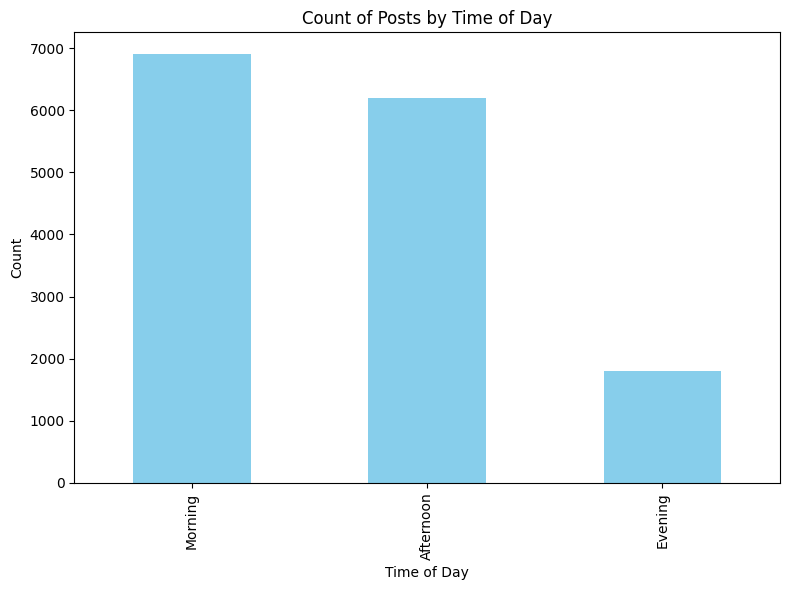

In [16]:
import matplotlib.pyplot as plt

# Count of unique values in the 'Time of Day' column
time_of_day_counts = merged_df['Time of Day'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
time_of_day_counts.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Count of Posts by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

# Show plot
plt.tight_layout()
plt.show()


Printing out the unique weekdays to see if all of them got added

In [17]:
# Extract unique weekdays
unique_weekdays = merged_df['Day of Week'].unique()

# Display the unique weekdays
print("Unique Weekdays:")
for weekday in unique_weekdays:
    print(weekday)

Unique Weekdays:
Sunday
Saturday
Friday
Thursday
Wednesday
Tuesday
Monday


Printing out the unique times of day to see if all of them got added

In [18]:
# Extract unique times of the day
unique_times_of_day = merged_df['Time of Day'].unique()

# Display the unique times of the day
print("Unique Times of Day:")
for time_of_day in unique_times_of_day:
    print(time_of_day)

Unique Times of Day:
Afternoon
Evening
Morning


Plot three graphs that shows the engagement based on time of day

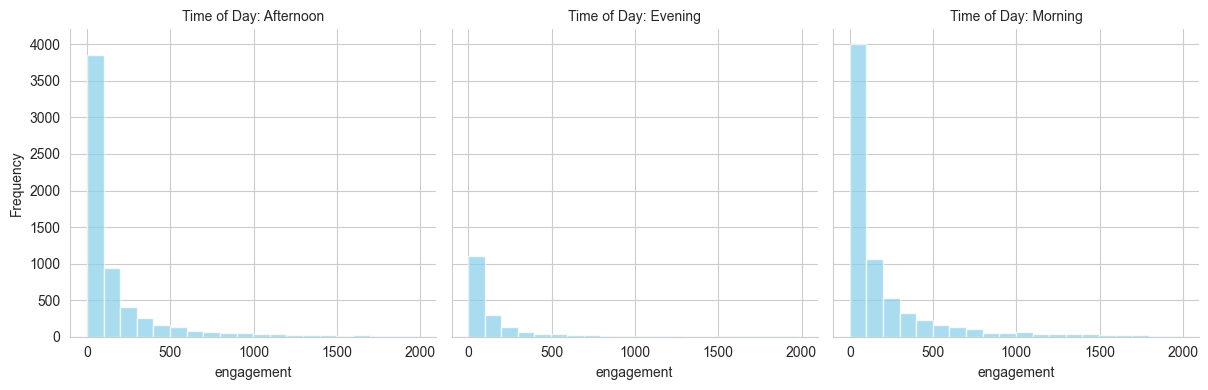

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create a facet grid of histograms
g = sns.FacetGrid(merged_df, col='Time of Day', col_wrap=3, height=4)
g.map(plt.hist, 'engagement', bins=20, color='skyblue', alpha=0.7)

# Set labels and titles
g.set_axis_labels("engagement", "Frequency")
g.set_titles("Time of Day: {col_name}")

# Show the plot
plt.show()


Plot the engagement during the different times of day

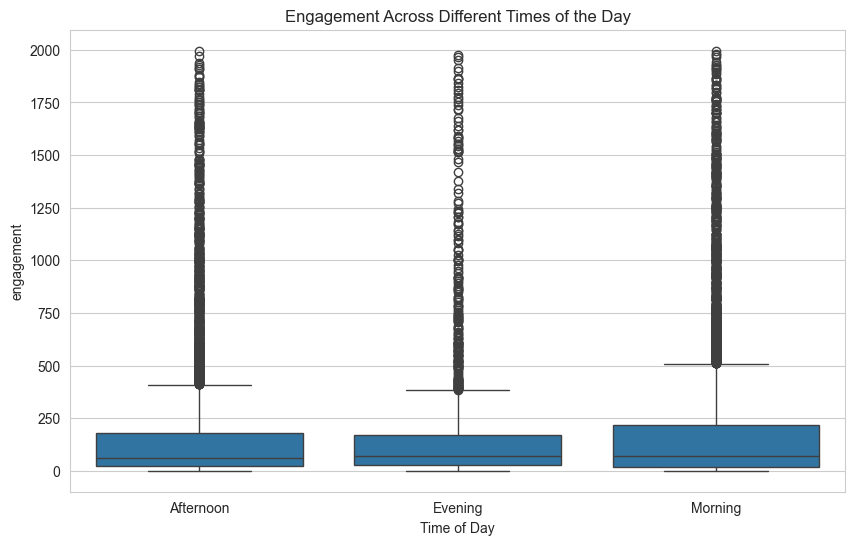

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time of Day', y='engagement', data=merged_df)
plt.title('Engagement Across Different Times of the Day')
plt.xlabel('Time of Day')
plt.ylabel('engagement')
plt.show()

Plot the distribution of the engagement

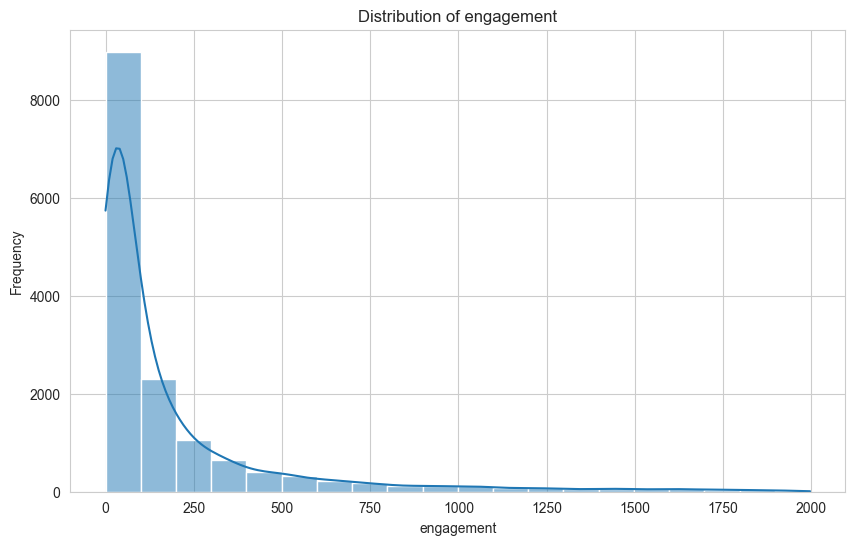

In [21]:
# Create histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['engagement'], bins=20, kde=True)
plt.title('Distribution of engagement')
plt.xlabel('engagement')
plt.ylabel('Frequency')
plt.show()


Shapiro-Wilk test to see if the data is normally distributed

In [22]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
statistic, p_value = shapiro(merged_df['engagement'])

# Display the test result
print("Shapiro-Wilk Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")


Shapiro-Wilk Test Results:
Test Statistic: 0.6012907028198242
p-value: 0.0
The data does not follow a normal distribution (reject the null hypothesis).


c:\Users\matth\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Based on the Shapiro-Wilk test, which is a statistical test used to determine whether a dataset comes from a normally distribution population, it shows that the p value is extremely small and therefore indicates strong eevidence against the null hypothesis. The null hypothesis being that the data follows a normal distribution. Which is not the case 

levene test to look at the homogeneity of varianc

In [23]:
from scipy.stats import levene

# Levene's test for homogeneity of variance
statistic, p_value = levene(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display the test result
print("Levene's Test Results:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

# Interpretation
alpha = 0.05  # significance level
if p_value > alpha:
    print("The variances are approximately equal across groups (fail to reject the null hypothesis).")
else:
    print("The variances are significantly different across groups (reject the null hypothesis).")


Levene's Test Results:
Test Statistic: 10.397825850822443
p-value: 3.072052731037042e-05
The variances are significantly different across groups (reject the null hypothesis).


The Levene's test for homogeneity of variance is a statistical test used to assess whether the variance of two or more groups are approximately equal. 

The test result shows that the p-value is approximately 0.00003 which is very small, and indicates strong evidence against the null hypothesis. The null hypothesis in this case being that the variance of the engagement levels across the three time periods are equal.

Therefore, it can be concluded that the variances are significantly different across the groups. Therefore, we reject the null hypothesis.

## Hypothesis H1a: Post time significantly affects user engagement in Facebook posts

Kruskal-Wallis test to answer H1a

In [24]:
from scipy.stats import kruskal

# Define the engagement data for each time period
engagement_morning = merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna()
engagement_afternoon = merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna()
engagement_evening = merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()

# Perform Kruskal-Wallis test
result_kruskal = kruskal(engagement_morning, engagement_afternoon, engagement_evening)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Interpret the results
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print("There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).")
else:
    print("There is no significant difference in user engagement levels among posts made during different time periods (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 6.482566158530142
p-value: 0.039113676941074205
There is a significant difference in user engagement levels among posts made during different time periods (reject the null hypothesis).


The Kruskal-Wallis test, is a non-parametric test used to determine if there are differences in the medians of three or more independent groups.

Since the p-value (0.0391) is less than the significance level (0.05), we reject the null hypothesis. Which means that there are significant differences in user engagement levels among posts made during different time periods.

This means that the H1a hypothesis: Post time significantly affects user engagement in Facebook posts, is true.

Mann-Whitney U test, with Bonferroni correction

In [25]:
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Kruskal-Wallis test
result_kruskal = kruskal(
    merged_df[merged_df['Time of Day'] == 'Morning']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Afternoon']['engagement'].dropna(),
    merged_df[merged_df['Time of Day'] == 'Evening']['engagement'].dropna()
)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Perform pairwise comparisons using Mann-Whitney U test with Bonferroni correction
alpha = 0.05
n_groups = len(time_periods)
pairwise_comparisons = list(combinations(time_periods, 2))
for group1, group2 in pairwise_comparisons:
    group1_data = merged_df[merged_df['Time of Day'] == group1]['engagement'].dropna()
    group2_data = merged_df[merged_df['Time of Day'] == group2]['engagement'].dropna()
    
    # Perform Mann-Whitney U test
    result_mannwhitney = mannwhitneyu(group1_data, group2_data)
    
    # Apply Bonferroni correction to the significance level
    adjusted_alpha = alpha / len(pairwise_comparisons)
    
    # Display pairwise comparison results
    print(f"\nPairwise Comparison: {group1} vs {group2}")
    print("U-statistic:", result_mannwhitney.statistic)
    print("p-value:", result_mannwhitney.pvalue)
    if result_mannwhitney.pvalue < adjusted_alpha:
        print("The difference is statistically significant (reject the null hypothesis).")
    else:
        print("There is no statistically significant difference (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 6.482566158530142
p-value: 0.039113676941074205

Pairwise Comparison: Morning vs Afternoon
U-statistic: 21885688.5
p-value: 0.024039886133032824
There is no statistically significant difference (fail to reject the null hypothesis).

Pairwise Comparison: Morning vs Evening
U-statistic: 6225550.0
p-value: 0.9040703265671269
There is no statistically significant difference (fail to reject the null hypothesis).

Pairwise Comparison: Afternoon vs Evening
U-statistic: 5427016.0
p-value: 0.051846974784638004
There is no statistically significant difference (fail to reject the null hypothesis).


These pairwise comparisons show that only the comparison between morning and afternoon posts yielded a statistically significant different.

## Hypotheses H1b: Users show more engagement in morning posts compared to posts made in the evening.

Mann-Whitney U test to answer H1b

In [26]:
from scipy.stats import mannwhitneyu

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 21885688.5
p-value: 0.024039886133032824
The difference is statistically significant (reject the null hypothesis).

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 6225550.0
p-value: 0.9040703265671269
There is no statistically significant difference (fail to reject the null hypothesis).

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 5427016.0
p-value: 0.051846974784638004
There is no statistically significant difference (fail to reject the null hypothesis).



The results show there is a significant difference between engagement levels in the morning and afternoon posts, while no significant difference were between morning vs evening and afternoon vs evening.

This means that the H1b hypothesis: Users show more engagement in morning posts compared to posts made in the evening, is rejected






Common Language Effect Size (CLES) indicated the probability that a randomly selected observation from one group will exceed a randomly selected observation from another group.

In [27]:
from scipy.stats import mannwhitneyu
import numpy as np

# Define the time periods for comparison
time_periods = ['Morning', 'Afternoon', 'Evening']

# Define a function to calculate the Common Language Effect Size
def cles_ind(x1, x2):
    """Calculate Common Language Effect Size Indicator for independent groups.
    Arguments:
    x1, x2: Arrays of values for two groups
    Returns:
    cles: Common Language Effect Size
    """
    x1 = np.array(x1)
    x2 = np.array(x2)
    diff = x1[:, None] - x2
    cles = (diff > 0).sum() / diff.size
    return cles

# Perform Mann-Whitney U tests for each pair of time periods
for i in range(len(time_periods)):
    for j in range(i+1, len(time_periods)):
        # Select engagement data for the current pair of time periods
        data_1 = merged_df[merged_df['Time of Day'] == time_periods[i]]['engagement'].dropna()
        data_2 = merged_df[merged_df['Time of Day'] == time_periods[j]]['engagement'].dropna()
        
        # Perform Mann-Whitney U test
        result = mannwhitneyu(data_1, data_2)
        
        # Display Mann-Whitney U test results
        print(f"Mann-Whitney U Test Results for {time_periods[i]} vs {time_periods[j]}:")
        print("U-statistic:", result.statistic)
        print("p-value:", result.pvalue)
        
        # Determine if the test passes or fails based on the significance level (e.g., 0.05)
        alpha = 0.05
        if result.pvalue < alpha:
            print("The difference is statistically significant (reject the null hypothesis).")
        else:
            print("There is no statistically significant difference (fail to reject the null hypothesis).")
        print()
        
        # Calculate the Common Language Effect Size
        cles = cles_ind(data_1, data_2)
        print("Common Language Effect Size:", cles)
        print()


Mann-Whitney U Test Results for Morning vs Afternoon:
U-statistic: 21885688.5
p-value: 0.024039886133032824
The difference is statistically significant (reject the null hypothesis).



Common Language Effect Size: 0.5109555915944219

Mann-Whitney U Test Results for Morning vs Evening:
U-statistic: 6225550.0
p-value: 0.9040703265671269
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.498680780455926

Mann-Whitney U Test Results for Afternoon vs Evening:
U-statistic: 5427016.0
p-value: 0.051846974784638004
There is no statistically significant difference (fail to reject the null hypothesis).

Common Language Effect Size: 0.4846966606541426



Looking at the results:
Morning vs afternoon: the CLES value is approximately 0.511 which indicates that there is a moderate-sized effect, meaning that around 51.1% of the time, engagement levels in the morning posts exceed those in the afternoon.

Morning vs evening: the CLES value is approximately 0.499 which indicates that there is a moderatesized effect, with morning posts showing slightly higher engagement levels than evening posts around 49.9% of the time.

Afternoon vs evening: the CLES value is approximately 0.485 which indicates that there is a moderatesized effect, with morning posts showing slightly higher engagement levels than evening posts around 48.5% of the time.

## Hypothesis H1c: Weekdays show more engagement compared to weekends

Kruskal Wallis

In [28]:
from scipy.stats import kruskal

# Separate engagement data for weekdays and weekends
engagement_weekdays = merged_df[merged_df['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]['engagement'].dropna()
engagement_weekends = merged_df[merged_df['Day of Week'].isin(['Saturday', 'Sunday'])]['engagement'].dropna()

# Perform Kruskal-Wallis test
result_kruskal = kruskal(engagement_weekdays, engagement_weekends)

# Display Kruskal-Wallis test results
print("Kruskal-Wallis Test Results:")
print("H-statistic:", result_kruskal.statistic)
print("p-value:", result_kruskal.pvalue)

# Interpretation
alpha = 0.05
if result_kruskal.pvalue < alpha:
    print("There is a significant difference in engagement levels between weekdays and weekends (reject the null hypothesis).")
else:
    print("There is no significant difference in engagement levels between weekdays and weekends (fail to reject the null hypothesis).")


Kruskal-Wallis Test Results:
H-statistic: 11.00924276435988
p-value: 0.0009065867541348773
There is a significant difference in engagement levels between weekdays and weekends (reject the null hypothesis).


The obtained p-value (0.0009) is less than the significant level, indicating that there is a significant evidence against the null hypothesis of no difference in engagement levels between weekdays and weekends. Therefore, you reject the null hypothesis and conclude that there are significant differences in engagement levels between weekdays and weekends.

The kruskal-Wallis test detected a significant difference in engagement levels between weekdays and weekends, supporting the hypothesis that weekdays show more engagement compares to weekends.

In [29]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
result_mannwhitney = mannwhitneyu(engagement_weekdays, engagement_weekends)

# Display Mann-Whitney U test results
print("Mann-Whitney U Test Results:")
print("U-statistic:", result_mannwhitney.statistic)
print("p-value:", result_mannwhitney.pvalue)

# Interpretation
alpha = 0.05
if result_mannwhitney.pvalue < alpha:
    print("There is a significant difference in engagement levels between weekdays and weekends (reject the null hypothesis).")
else:
    print("There is no significant difference in engagement levels between weekdays and weekends (fail to reject the null hypothesis).")


Mann-Whitney U Test Results:
U-statistic: 20542887.5
p-value: 0.0009065940691726259
There is a significant difference in engagement levels between weekdays and weekends (reject the null hypothesis).


The obtained p-value (0.0009) is less than the significance level, indicating that there is significant evidence against the null hypothesis of no difference in engagement levels between weekdays and weekends. Therefore, you reject the null hypothesis and conclude that there are significant differences in engagement levels between weekdays and weekends.

Therefore the test further provides support for the hypothesis that weekdays show more engagement compared to weekends.

In [30]:
merged_df.head()

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,nr_likes,link_posts,...,video_posts,profile_id,post_id,link,followers,engagement,Timezone,Difference,Day of Week,Time of Day
0,2023-12-31 15:40:00,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,13,NaN,...,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,17.083333,ET: 6 hours,6.0,Sunday,Afternoon
1,2023-12-31 14:01:00,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,33,NaN,...,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,35.000060,ET: 6 hours,6.0,Sunday,Afternoon
2,2023-12-31 13:30:00,fun spot america,Don't miss our HUGE firework display ! 🥳\r\n\r...,23,2,3,2,NaN,21,NaN,...,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,25.000090,ET: 6 hours,6.0,Sunday,Afternoon
3,2023-12-31 19:00:00,disneyland paris,Fijne jaarwisseling! 🥂🎉\r\nEn tot volgend jaar 😉,646,52,12,56,NaN,478,NaN,...,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,582.000007,NaN,NaN,Sunday,Evening
4,2023-12-31 10:00:00,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,16,NaN,...,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20.000000,PT: 9 hours,9.0,Sunday,Morning


Rename the day of week and time of day columns

In [31]:
merged_df.rename(columns={'Day of Week': 'day_of_week', 'Time of Day': 'time_of_day'}, inplace=True)


Check if the column names have actually changed

In [32]:
merged_df.columns

Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'nr_likes',
       'link_posts', 'picture_posts', 'video_posts', 'profile_id', 'post_id',
       'link', 'followers', 'engagement', 'Timezone', 'Difference',
       'day_of_week', 'time_of_day'],
      dtype='object')

Change merged_df back to df

In [33]:
df = merged_df
df.columns


Index(['date', 'profile', 'message', 'nr_reactions', 'nr_comments',
       'nr_shares', 'comments/post', 'post_interaction_rate', 'nr_likes',
       'link_posts', 'picture_posts', 'video_posts', 'profile_id', 'post_id',
       'link', 'followers', 'engagement', 'Timezone', 'Difference',
       'day_of_week', 'time_of_day'],
      dtype='object')

## *Exporting the dataframe for further analysis*
To work on our multilevel analysis, we will now create a new csv version of the dataframe, which includes the two features that have been created in this notebook (has_emoji, emoji_type).

In [34]:
import os

# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the name of the folder within the repository
folder_name = '02_new dataframes'

# Construct the full path to the folder within the repository
folder_path = os.path.join(notebook_directory, folder_name)

# Define the file path for the CSV file within the folder
csv_file_path = os.path.join(folder_path, 'H1_dataframe.csv')

# Save the updated DataFrame to a CSV file in the specified folder
df.to_csv(csv_file_path, index=False)